# __911 Calls Capstone Project__ - ``Exercise``

<hr>

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
**Import numpy and pandas**

In [2]:
import numpy as np
import pandas as pd

**Import visualization libraries and set %matplotlib inline.**

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

**Read in the csv file as a dataframe called df**

In [8]:
df = pd.read_csv('911.csv')

**Check the info() of the df**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Check the head of df**

In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


<hr>

## Basic Questions

**1. What are the top 5 zipcodes for 911 calls?**

In [21]:
df['zip'].value_counts()


# The top 5 zipcodes = 
# 1. 19401
# 2. 19464
# 3. 19403
# 4. 19446
# 5. 19406

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
           ... 
77316.0       1
19457.0       1
19139.0       1
19119.0       1
17752.0       1
Name: zip, Length: 104, dtype: int64

**2. What are the top 5 townships (twp) for 911 calls?**

In [22]:
df['twp'].value_counts()

# The top 5 township = 
# 1. LOWER MERION
# 2. ABINGTON
# 3. NORRISTOWN
# 4. UPPER MERION
# 5. CHELTENHAM

LOWER MERION     8443
ABINGTON         5977
NORRISTOWN       5890
UPPER MERION     5227
CHELTENHAM       4575
                 ... 
BRYN ATHYN        173
SALFORD           163
GREEN LANE         51
PHILA COUNTY       43
LEHIGH COUNTY      30
Name: twp, Length: 68, dtype: int64

**3. Take a look at the 'title' column, how many unique title codes are there?**

In [24]:
df['title'].describe(include='O')

# There are 110 UNIQUES of title

count                           99492
unique                            110
top       Traffic: VEHICLE ACCIDENT -
freq                            23066
Name: title, dtype: object

In [94]:
df['title'].nunique()

110

____
## Creating new features

**4. In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

*For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.*

In [ ]:
# title = df['title'][0]
# title -> STRING
# title.split(":")

In [28]:
df['reason'] = df['title'].str.split(': ').str[0]
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS


**5. What is the most common Reason for a 911 call based off of this new column?**

In [30]:
df['reason'].value_counts()

# The most Reason 
# 1. EMS
# 2. Traffic
# 3. Fire

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

**6. Now use seaborn to create a countplot of 911 calls by Reason.**

In [35]:
plot =pd.DataFrame(df['reason'].value_counts().reset_index().rename(columns={"index": "reason", "reason": "counts"}))
plot

,reason,counts
0,EMS,48877
1,Traffic,35695
2,Fire,14920


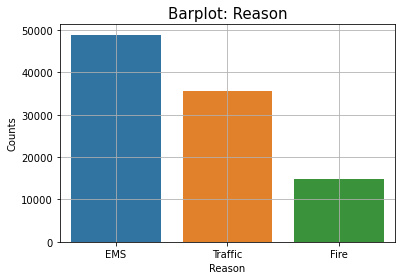

In [36]:
sns.barplot(data=plot, x='reason', y='counts')
plt.title('Barplot: Reason', size=15)
plt.xlabel('Reason')
plt.ylabel('Counts')
plt.grid()
plt.show()

___
**7. Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?**

In [108]:
df['timeStamp'].dtype
type(df['timeStamp'].iloc[0])

# timeStamp = Object data type

pandas._libs.tslibs.timestamps.Timestamp

**8. You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.**

In [46]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   lat        99492 non-null  float64       
 1   lng        99492 non-null  float64       
 2   desc       99492 non-null  object        
 3   zip        86637 non-null  float64       
 4   title      99492 non-null  object        
 5   timeStamp  99492 non-null  datetime64[ns]
 6   twp        99449 non-null  object        
 7   addr       98973 non-null  object        
 8   e          99492 non-null  int64         
 9   reason     99492 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 7.6+ MB


**9. You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [51]:
time_stamp_dt = df['timeStamp'].dt

In [83]:
df['hour'] = time_stamp_dt.hour
df['month'] = time_stamp_dt.month_name()
df.sample(4)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day
80587,40.190391,-75.269540,LAFAYETTE AVE & WISSAHICKON GREEN RIBBON TRL; ...,19454.0,Fire: FIRE ALARM,2016-07-07 14:32:01,WHITEMARSH,LAFAYETTE AVE & WISSAHICKON GREEN RIBBON TRL,1,Fire,14,July,Thursday
87677,40.108241,-75.345239,W FRONT ST & DEKALB ST; BRIDGEPORT; 2016-07-25...,19405.0,Traffic: VEHICLE ACCIDENT -,2016-07-25 16:51:01,BRIDGEPORT,W FRONT ST & DEKALB ST,1,Traffic,16,July,Monday
74393,40.279591,-75.417912,FREEMAN SCHOOL RD & SALFORDVILLE RD; LOWER SAL...,19438.0,Traffic: VEHICLE ACCIDENT -,2016-06-20 19:21:00,LOWER SALFORD,FREEMAN SCHOOL RD & SALFORDVILLE RD,1,Traffic,19,June,Monday
12276,40.116366,-75.200672,BRIDLE LN & SCOTT RD; SPRINGFIELD; Station 31...,19075.0,EMS: LACERATIONS,2016-01-12 13:17:01,SPRINGFIELD,BRIDLE LN & SCOTT RD,1,EMS,13,January,Tuesday


**Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:**

   dmap = {0:'Mon',1:'Tue',2:'W ed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [97]:
df['day'] = time_stamp_dt.day_name()
df['month_num'] = time_stamp_dt.month
df.sample(4)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day,date,month_num
93146,40.074918,-75.301318,4TH AVE & HALLOWELL ST; CONSHOHOCKEN; 2016-08-...,19428.0,Fire: FIRE ALARM,2016-08-07 21:42:01,CONSHOHOCKEN,4TH AVE & HALLOWELL ST,1,Fire,21,August,Sunday,2016-08-07,8
91671,40.257732,-75.337004,DOCK DR & WOODS DR; TOWAMENCIN; Station 345B;...,19446.0,EMS: RESPIRATORY EMERGENCY,2016-08-04 08:02:00,TOWAMENCIN,DOCK DR & WOODS DR,1,EMS,8,August,Thursday,2016-08-04,8
90767,40.074257,-75.309695,ELM ST & MAPLE ST; CONSHOHOCKEN; 2016-08-01 @ ...,19428.0,Fire: FIRE ALARM,2016-08-01 20:32:00,CONSHOHOCKEN,ELM ST & MAPLE ST,1,Fire,20,August,Monday,2016-08-01,8
50077,40.309711,-75.510200,VALLEY STREAM DR & DEAD END; UPPER FREDERICK; ...,NaN,Fire: FIRE SPECIAL SERVICE,2016-04-17 20:27:00,UPPER FREDERICK,VALLEY STREAM DR & DEAD END,1,Fire,20,April,Sunday,2016-04-17,4


**10. Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

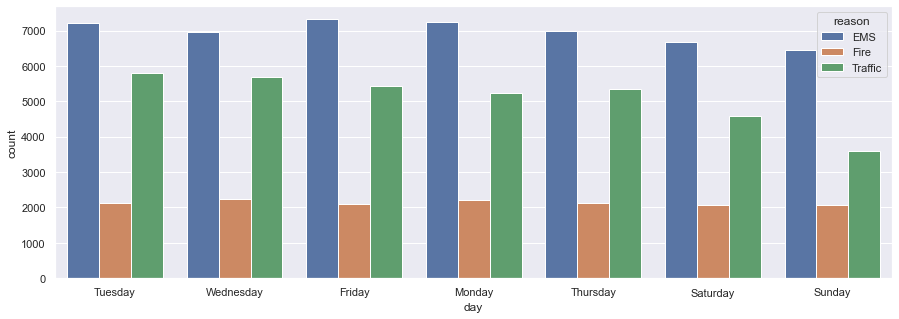

In [69]:
# Counts the day
plt.figure (figsize=(15,5))

sns.set(style='darkgrid')
sns.countplot(x = 'day',
              data = df,
              hue = df['reason'],
              order = df['day'].value_counts().index)
plt.show()

**11. Now do the same for Month:**

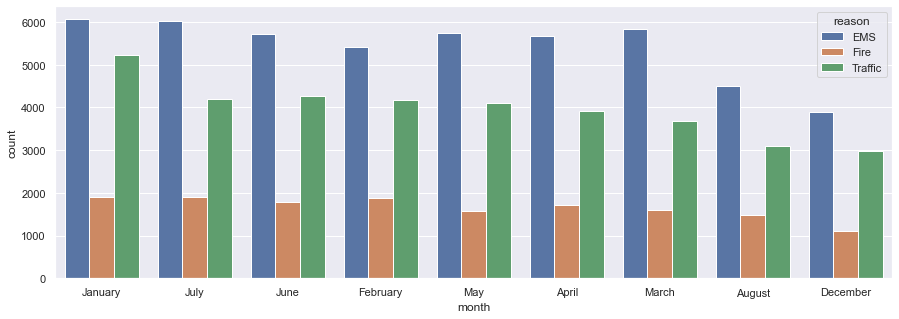

In [70]:
plt.figure (figsize=(15,5))

sns.set(style='darkgrid')
sns.countplot(x = 'month',
              data = df,
              hue = df['reason'],
              order = df['month'].value_counts().index)
plt.show()

**Did you notice something strange about the Plot?**

``It is missing some months! 9,10, and 11 are not there.``

**You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...**

**12. Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.**

In [95]:
bymonth = df.groupby(by='month').count()
bymonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day,date
month,,,,,,,,,,,,,
April,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
August,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078
December,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969
February,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
January,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
July,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137
June,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786
March,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
May,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3246 sha256=8f8722d387578015e115b4629ab22dfd45f404e78b5c9cf2bd9afa76a641ce4e
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\9a\0d\2e\309df76f445367ea1777b73df0feb347b9c8d204ead35fdb10
Successfully built sorted-months-weekdays


In [125]:
month_counts =pd.DataFrame(df['month_num'].value_counts().reset_index().rename(columns={"index": "month", "month": "counts"}))
month_counts.sort_values(by='month',ascending=True,inplace=True)

In [126]:
month_counts

,month,month_num
0,1,13205
3,2,11467
6,3,11101
5,4,11326
4,5,11423
2,6,11786
1,7,12137
7,8,9078
8,12,7969


**13. Now create a simple plot off of the dataframe indicating the count of calls per month.**

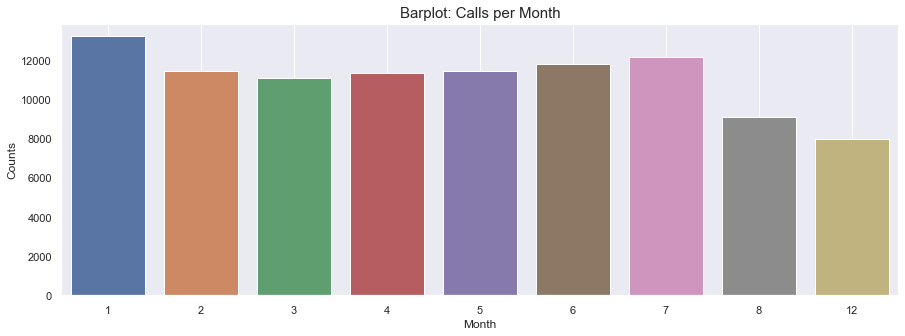

In [128]:
plt.figure (figsize=(15,5))
sns.barplot(data=month_counts, x='month', y='month_num')
plt.title('Barplot: Calls per Month', size=15)
plt.xlabel('Month')
plt.ylabel('Counts')
plt.grid()
plt.show()

**14. Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.**

<Figure size 1080x360 with 0 Axes>

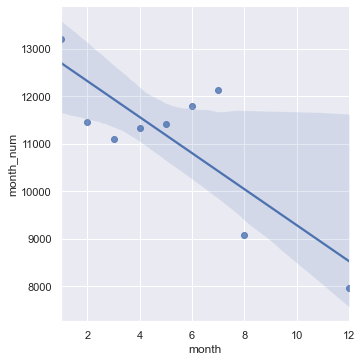

In [129]:
plt.figure (figsize=(15,5))
sns.lmplot(x ='month', y='month_num', data = month_counts) 
  
# Show the plot 
plt.show() 

**15. Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.** 

In [85]:
df['date'] = time_stamp_dt.date
df.sample(4)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day,date
71101,40.196668,-75.471009,W MAIN ST & E 3RD AVE; TRAPPE; 2016-06-12 @ 10...,19426.0,Traffic: VEHICLE ACCIDENT -,2016-06-12 10:56:02,TRAPPE,W MAIN ST & E 3RD AVE,1,Traffic,10,June,Sunday,2016-06-12
93627,40.271767,-75.648561,LEVENGOOD RD & NAGLE RD; WEST POTTSGROVE; Sta...,19464.0,EMS: CARDIAC EMERGENCY,2016-08-09 10:42:01,WEST POTTSGROVE,LEVENGOOD RD & NAGLE RD,1,EMS,10,August,Tuesday,2016-08-09
44382,40.144953,-75.116750,EASTON RD & PARK AVE; UPPER MORELAND; 2016-04-...,19090.0,Traffic: VEHICLE ACCIDENT -,2016-04-02 14:17:01,UPPER MORELAND,EASTON RD & PARK AVE,1,Traffic,14,April,Saturday,2016-04-02
6713,40.155987,-75.122054,EASTON RD & FITZWATERTOWN RD; UPPER MORELAND; ...,19090.0,Traffic: VEHICLE ACCIDENT -,2015-12-28 12:17:01,UPPER MORELAND,EASTON RD & FITZWATERTOWN RD,1,Traffic,12,December,Monday,2015-12-28


**16. Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [124]:
date_counts =pd.DataFrame(df['date'].value_counts().reset_index().rename(columns={"index": "date", "date": "counts"}))
date_counts = date_counts.sort_values(by='date')
date_counts.sample(4)

,date,counts
207,2016-01-18,333
245,2016-01-31,283
193,2016-08-10,345
120,2015-12-17,388


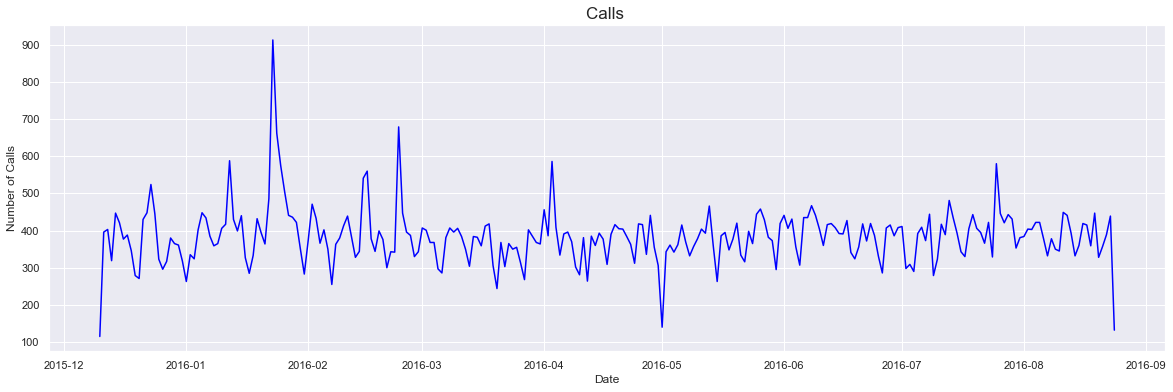

In [123]:
plt.figure(figsize=(20,6))                                     # Figure Size
plt.plot(date_counts['date'],
         date_counts['counts'],      
        'blue')                                               
plt.title('Calls ', size=17)  
plt.xlabel('Date')                                         
plt.ylabel('Number of Calls')                            
plt.show()

**17. Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

In [148]:
## Filtering for each reason
ems = df[df['reason']=='EMS']

date_ems =pd.DataFrame(ems['date'].value_counts().reset_index().rename(columns={"index": "date", "date": "counts"}))
date_ems = date_ems.sort_values(by='date')
date_ems



,date,counts
258,2015-12-10,57
155,2015-12-11,186
137,2015-12-12,189
126,2015-12-13,190
12,2015-12-14,222
...,...,...
245,2016-08-20,159
231,2016-08-21,165
174,2016-08-22,182
17,2016-08-23,218


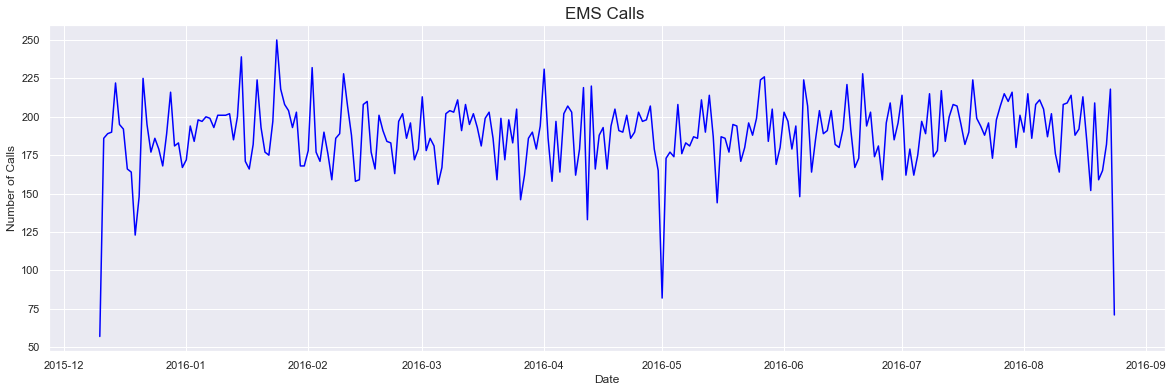

In [141]:
plt.figure(figsize=(20,6))                                     # Figure Size
plt.plot(date_ems['date'],
         date_ems['counts'],      
        'blue')                                               
plt.title('EMS Calls ', size=17)  
plt.xlabel('Date')                                         
plt.ylabel('Number of Calls')                            
plt.show()

In [149]:
## Filtering for each reason
fire = df[df['reason']=='Fire']

date_fire =pd.DataFrame(fire['date'].value_counts().reset_index().rename(columns={"index": "date", "date": "counts"}))
date_fire = date_fire.sort_values(by='date')
date_fire

,date,counts
258,2015-12-10,15
35,2015-12-11,69
45,2015-12-12,68
164,2015-12-13,51
235,2015-12-14,39
...,...,...
157,2016-08-20,52
139,2016-08-21,54
169,2016-08-22,51
31,2016-08-23,70


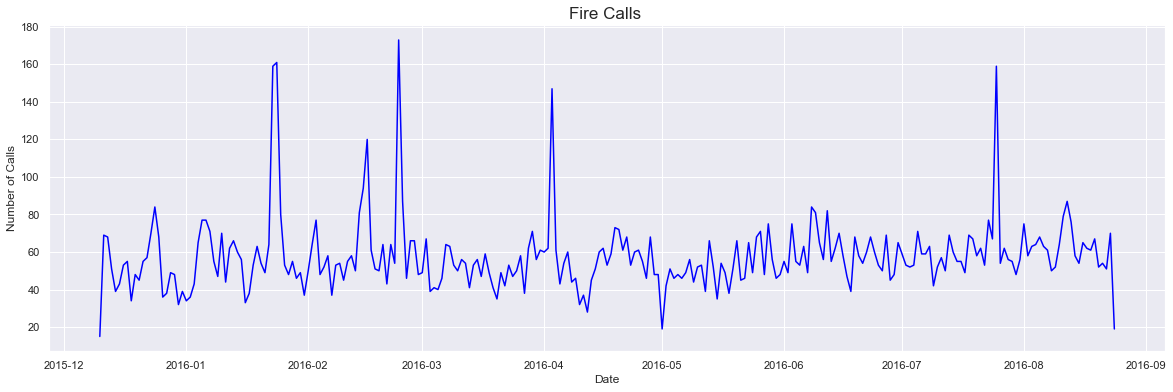

In [150]:
plt.figure(figsize=(20,6))                                     # Figure Size
plt.plot(date_fire['date'],
         date_fire['counts'],      
        'blue')                                               
plt.title('Fire Calls ', size=17)  
plt.xlabel('Date')                                         
plt.ylabel('Number of Calls')                            
plt.show()

In [152]:
traffic = df[df['reason']=='Traffic']

date_traffic =pd.DataFrame(traffic['date'].value_counts().reset_index().rename(columns={"index": "date", "date": "counts"}))
date_traffic = date_traffic.sort_values(by='date')
date_traffic

,date,counts
256,2015-12-10,43
112,2015-12-11,141
92,2015-12-12,146
239,2015-12-13,78
19,2015-12-14,186
...,...,...
185,2016-08-20,117
124,2016-08-21,138
61,2016-08-22,156
74,2016-08-23,151


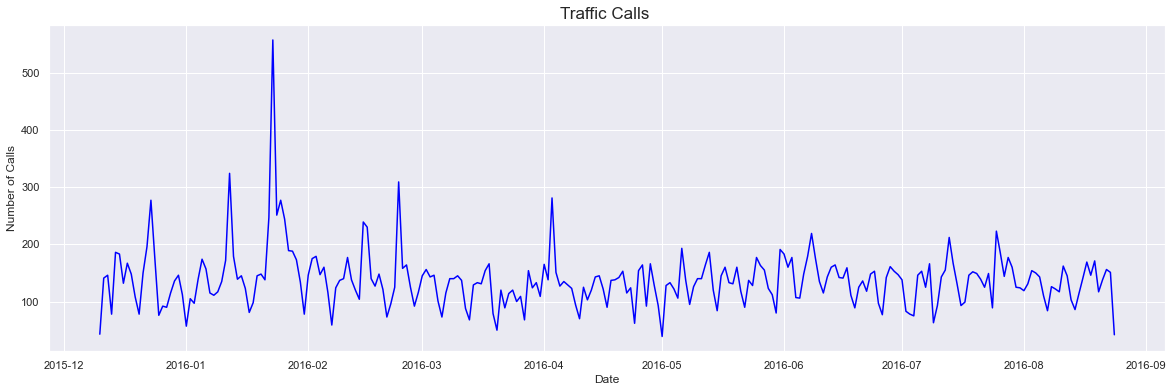

In [153]:
plt.figure(figsize=(20,6))                                     # Figure Size
plt.plot(date_traffic['date'],
         date_traffic['counts'],      
        'blue')                                               
plt.title('Traffic Calls ', size=17)  
plt.xlabel('Date')                                         
plt.ylabel('Number of Calls')                            
plt.show()

____
**18. Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [164]:
heat_maps = pd.crosstab(index=df['day'], columns=df['hour'])
heat_maps


hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
Friday,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Monday,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Saturday,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sunday,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thursday,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tuesday,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wednesday,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


**19. Now create a HeatMap using this new DataFrame.**

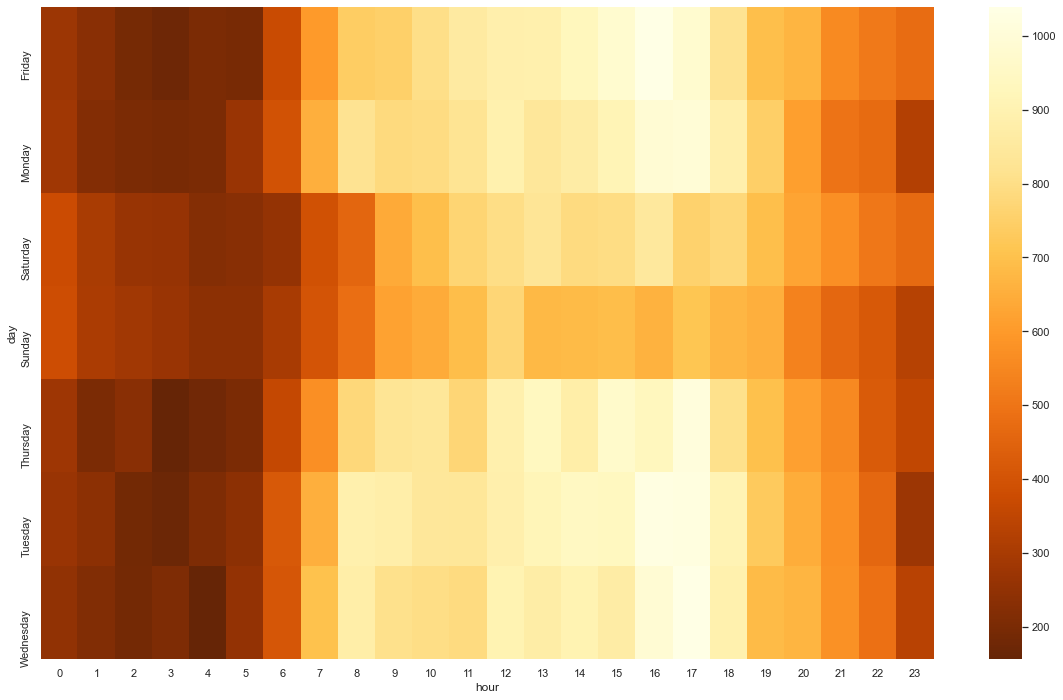

In [166]:
plt.figure(figsize = (20,12))
sns.heatmap(heat_maps,
            annot = False,
            cmap = 'YlOrBr_r')
plt.show()

**20. Now create a clustermap using this DataFrame.**

<Figure size 7200x864 with 0 Axes>

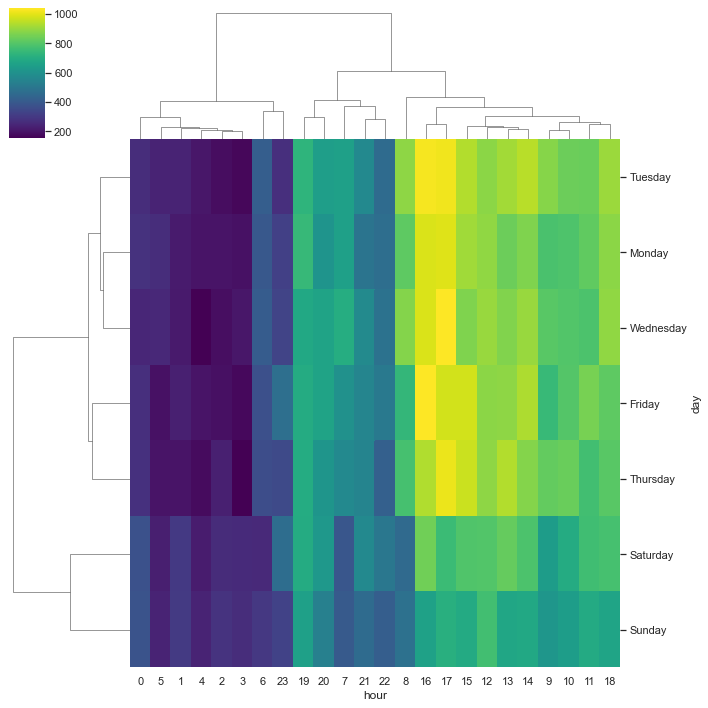

In [169]:
plt.figure(figsize = (100,12))
sns.clustermap(heat_maps, cmap='viridis')
plt.show()

**21. Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.**

In [170]:
heat_maps1 = pd.crosstab(index=df['day'], columns=df['month'])
heat_maps1


month,April,August,December,February,January,July,June,March,May
day,,,,,,,,,
Friday,1958,1310,1065,1581,1970,2045,1649,1525,1730
Monday,1598,1511,1257,1964,1727,1692,1617,1535,1779
Saturday,1734,1099,978,1441,2291,1695,1388,1266,1444
Sunday,1488,1021,907,1229,1960,1672,1333,1102,1424
Thursday,1601,1230,1266,1596,1584,1646,2065,1900,1590
Tuesday,1430,1612,1234,1753,1973,1670,1676,1884,1918
Wednesday,1517,1295,1262,1903,1700,1717,2058,1889,1538


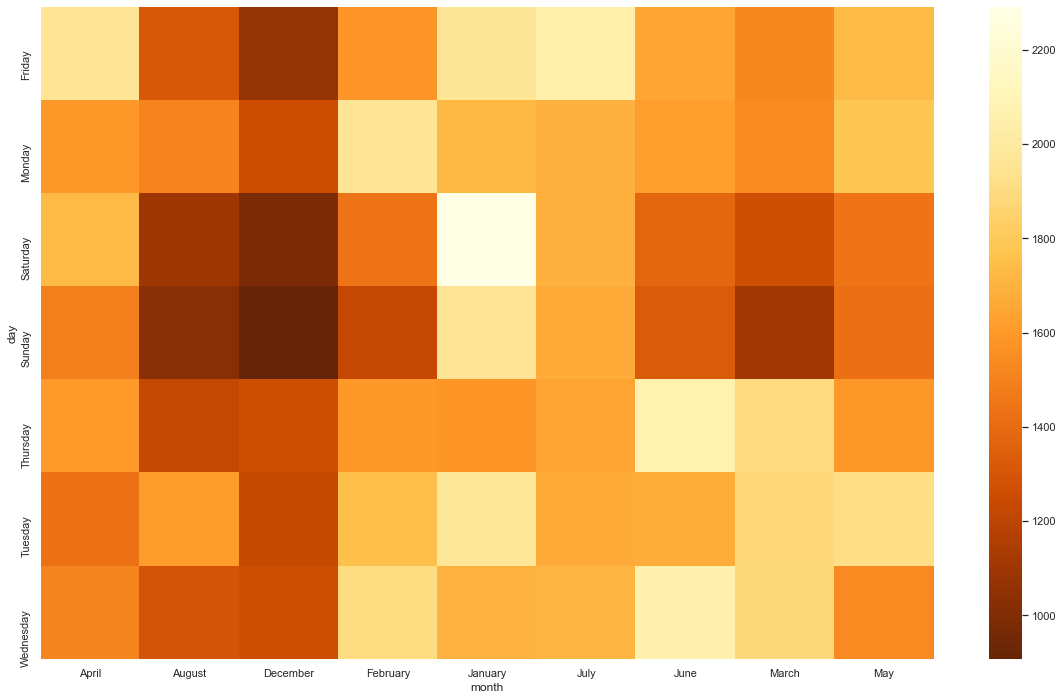

In [171]:
plt.figure(figsize = (20,12))
sns.heatmap(heat_maps1,
            annot = False,
            cmap = 'YlOrBr_r')
plt.show()

<Figure size 7200x864 with 0 Axes>

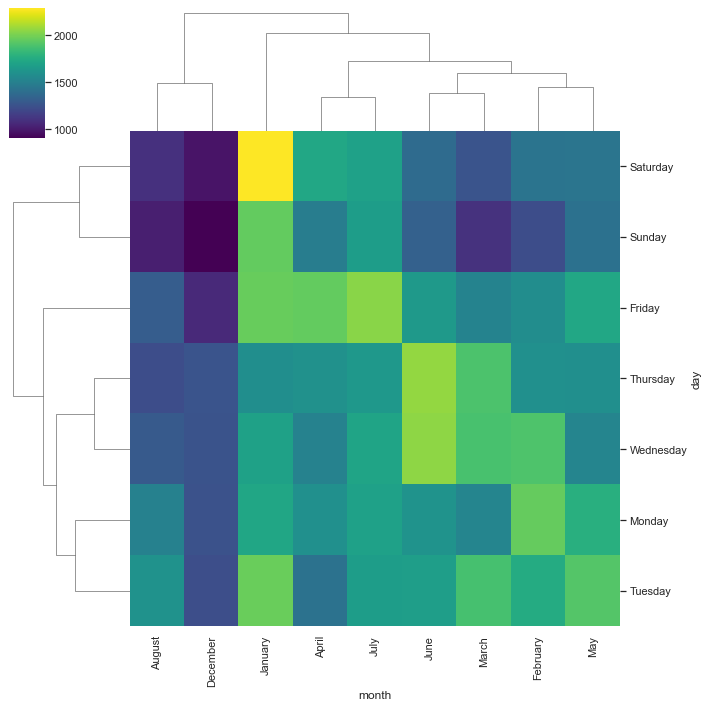

In [172]:
plt.figure(figsize = (100,12))
sns.clustermap(heat_maps1, cmap='viridis')
plt.show()

**Continue exploring the Data however you see fit!**
# Great Job!